# House Price Prediction Using Machine Learning

In [1]:
#create dataset
import csv
# Define column headers
headers = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
data = [
    [1, '2023-08-01', 3, 2, 1500, 5000, 1, 3, 7, 1300, 200, 1995, 0, 98001, 47.12345, -122.45678, 1600, 5500, 300000],
    [2, '2023-08-02', 4, 3, 2000, 6000, 2, 4, 8, 1800, 200, 2000, 0, 98002, 47.23456, -122.56789, 2200, 6000, 400000],
    [3, '2023-08-03', 4, 3, 2500, 6500, 2, 4, 8, 1900, 200, 2500, 0, 98002, 47.23456, -132.56789, 2300, 6500, 415000],
    [3,'2023-08-03',2,1,1000,3000,1,2,6,800,200,1980,0,98003,47.34567,-122.67890,1100,3500,250000],
    [4,'2023-08-04',3,2,1600,5500,1,3,7,1400,200,1998,0,98004,47.45678,-122.78901,1700,6000,500000],
    [5,'2023-08-05',4,3,2200,7000,2,4,8,2000,200,2005,0,98005,47.56789,-122.89012,2300,7500,600000],
    [6,'2023-08-06',3,2,1800,6500,1,3,7,1600,200,1985,0,98006,47.67890,-122.90123,1900,7000,450000],
    [7,'2023-08-07',2,1,1200,4000,1,3,6,900,300,1960,2005,98007,47.78901,-122.01234,1300,4500,320000],
    [8,'2023-08-08',3,2,1700,6000,1,4,7,1400,300,1992,0,98008,47.89012,-122.12345,1800,5500,380000],
    [9,'2023-08-09',4,3,2400,8000,2,3,8,2000,400,2000,2020,98009,47.90123,-122.23456,2200,7500,550000],
    [10,'2023-08-10',3,2,1900,6500,1,4,7,1600,300,1988,0,98010,47.01234,-122.34567,2000,6000,420000],
    [11,'2023-08-11',5,4,3200,10000,2,5,9,2800,400,2010,0,98011,47.12345,-122.45678,3000,9000,700000],
    [12,'2023-08-12',2,1,1100,3500,1,3,6,900,200,1955,2002,98012,47.23456,-122.56789,1200,4000,280000],
    [13,'2023-08-13',4,3,2100,7000,2,4,8,1800,300,1997,0,98013,47.34567,-122.67890,2200,7000,480000],
    [14,'2023-08-14',3,2,1800,6000,1,4,7,1500,300,1989,2015,98014,47.45678,-122.78901,1900,6000,390000],
    [15,'2023-08-15',2,1,1300,4500,1,3,6,1000,300,1965,0,98015,47.56789,-122.89012,1400,5000,300000],
    [16,'2023-08-16',3,2,1700,5500,2,3,7,1400,300,1990,0,98016,47.67890,-122.90123,1800,5500,360000],
    [17,'2023-08-17',4,3,2300,7500,1,4,8,1900,400,2003,0,98017,47.78901,-122.01234,2200,7000,500000],
    [18,'2023-08-18',3,2,2000,6800,2,4,7,1700,300,2001,0,98018,47.89012,-122.12345,2100,7500,410000],
    [19,'2023-08-19',3,2,1600,5000,1,3,7,1300,300,1987,0,98019,47.90123,-122.23456,1700,6000,330000],
    [20,'2023-08-20',2,1,1200,4000,1,3,6,1000,200,1950,0,98020,47.01234,-122.34567,1300,4500,270000],
]
with open('data.csv','w',newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(data)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
np.random.seed(42)

In [3]:
data=pd.read_csv('data.csv',)
data.head(20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,2023-08-01,3,2,1500,5000,1,3,7,1300,200,1995,0,98001,47.12345,-122.45678,1600,5500,300000
1,2,2023-08-02,4,3,2000,6000,2,4,8,1800,200,2000,0,98002,47.23456,-122.56789,2200,6000,400000
2,3,2023-08-03,4,3,2500,6500,2,4,8,1900,200,2500,0,98002,47.23456,-132.56789,2300,6500,415000
3,3,2023-08-03,2,1,1000,3000,1,2,6,800,200,1980,0,98003,47.34567,-122.67890,1100,3500,250000
4,4,2023-08-04,3,2,1600,5500,1,3,7,1400,200,1998,0,98004,47.45678,-122.78901,1700,6000,500000
5,5,2023-08-05,4,3,2200,7000,2,4,8,2000,200,2005,0,98005,47.56789,-122.89012,2300,7500,600000
6,6,2023-08-06,3,2,1800,6500,1,3,7,1600,200,1985,0,98006,47.67890,-122.90123,1900,7000,450000
7,7,2023-08-07,2,1,1200,4000,1,3,6,900,300,1960,2005,98007,47.78901,-122.01234,1300,4500,320000
8,8,2023-08-08,3,2,1700,6000,1,4,7,1400,300,1992,0,98008,47.89012,-122.12345,1800,5500,380000
9,9,2023-08-09,4,3,2400,8000,2,3,8,2000,400,2000,2020,98009,47.90123,-122.23456,2200,7500,550000


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21 non-null     int64  
 1   date           21 non-null     object 
 2   bedrooms       21 non-null     int64  
 3   bathrooms      21 non-null     int64  
 4   sqft_living    21 non-null     int64  
 5   sqft_lot       21 non-null     int64  
 6   floors         21 non-null     int64  
 7   condition      21 non-null     int64  
 8   grade          21 non-null     int64  
 9   sqft_above     21 non-null     int64  
 10  sqft_basement  21 non-null     int64  
 11  yr_built       21 non-null     int64  
 12  yr_renovated   21 non-null     int64  
 13  zipcode        21 non-null     int64  
 14  lat            21 non-null     float64
 15  long           21 non-null     float64
 16  sqft_living15  21 non-null     int64  
 17  sqft_lot15     21 non-null     int64  
 18  price       

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,10.142857,3.142857,2.142857,1814.285714,5895.238095,1.380952,3.476190,7.142857,1523.809524,271.428571,2011.904762,382.952381,98010.095238,47.487355,-122.979419,1866.666667,6047.619048,409761.904762
std,5.994045,0.853564,0.853564,533.184503,1634.159169,0.497613,0.679636,0.853564,477.393718,71.713717,113.086208,808.979325,6.057266,0.307021,2.217587,458.621122,1331.397404,115612.241896
min,1.000000,2.000000,1.000000,1000.000000,3000.000000,1.000000,2.000000,6.000000,800.000000,200.000000,1950.000000,0.000000,98001.000000,47.012340,-132.567890,1100.000000,3500.000000,250000.000000
25%,5.000000,3.000000,2.000000,1500.000000,5000.000000,1.000000,3.000000,7.000000,1300.000000,200.000000,1985.000000,0.000000,98005.000000,47.234560,-122.789010,1600.000000,5500.000000,320000.000000
50%,10.000000,3.000000,2.000000,1800.000000,6000.000000,1.000000,3.000000,7.000000,1500.000000,300.000000,1992.000000,0.000000,98010.000000,47.456780,-122.567890,1900.000000,6000.000000,400000.000000
75%,15.000000,4.000000,3.000000,2100.000000,6800.000000,2.000000,4.000000,8.000000,1800.000000,300.000000,2000.000000,0.000000,98015.000000,47.789010,-122.234560,2200.000000,7000.000000,480000.000000
max,20.000000,5.000000,4.000000,3200.000000,10000.000000,2.000000,5.000000,9.000000,2800.000000,400.000000,2500.000000,2020.000000,98020.000000,47.901230,-122.012340,3000.000000,9000.000000,700000.000000


In [11]:
data = data.dropna()

In [12]:
X = data.drop('price', axis=1)
y=data['price']

In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


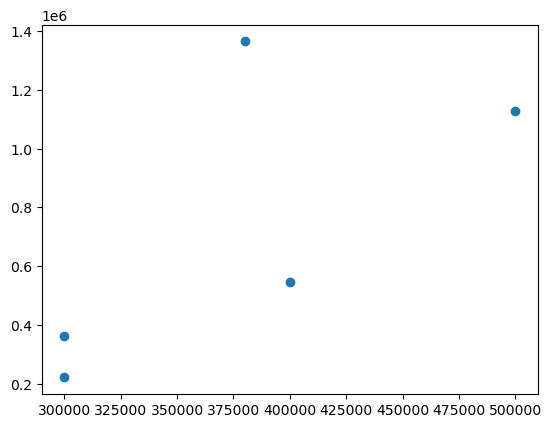

In [14]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)

In [15]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 279229247218.2298


In [17]:
#data to predict the price 
# Create a new DataFrame with example data for prediction
new_data = pd.DataFrame({
    'bedrooms': [4],
    'bathrooms': [3],
    'sqft_living': [1500],
    'sqft_lot': [5000],
    'floors': [1],
    'condition': [3],
    'grade': [7],
    'sqft_above': [2000],
    'sqft_basement': [200],
    'yr_built': [1995],
    'yr_renovated': [0],
    'zipcode': [98001],
    'lat': [47.12345],
    'long': [-122.45678],
    'sqft_living15': [1600],
    'sqft_lot15': [5500]
})

# Use the trained model to make predictions
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price}")


Predicted Price: [720489.28303927]
